In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [3]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNumber: int

In [4]:
def adder(state: AgentState) -> AgentState:
    """This node addes 2 numbers"""
    state["finalNumber"] = state["number1"] + state["number2"]
    return state

def Subtractor(state: AgentState) -> AgentState:
    """This node subtracts 2 numbers"""
    state["finalNumber"] = state["number1"] - state["number2"]
    return state

def decide_next_node(state: AgentState) -> AgentState:
    """This node will select the bext node of the graph"""
    if state["operation"] == "+":
        return "addition_operation"
    
    elif state["operation"] == "-":
        return "subtraction_operation"

In [5]:
graph = StateGraph(AgentState)

graph.add_node("adder_node", adder)
graph.add_node("subtractor_node", Subtractor)
graph.add_node("router_node", lambda state:state)

graph.add_edge(START, "router_node")

graph.add_conditional_edges(
    "router_node",
    decide_next_node,
    {
        "addition_operation": "adder_node",
        "subtraction_operation": "subtractor_node"
    }
)

graph.add_edge("adder_node", END)
graph.add_edge("subtractor_node", END)

app = graph.compile()

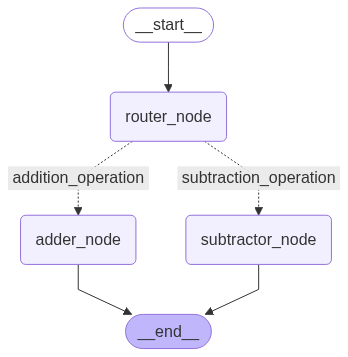

In [7]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [8]:
initial_state_1 = AgentState(number1=10, operation="-", number2=30)
print(app.invoke(initial_state_1))

{'number1': 10, 'operation': '-', 'number2': 30, 'finalNumber': -20}
